In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import os
import urllib.request
import pathlib
import urllib3
from concurrent.futures import ThreadPoolExecutor

In [2]:
# List of plants needed to be scrapped from the web
plant_name_list = ["carrots",'potato','tomato','onions','lettuce','bell pepper','pumpkin','zucchini','cauliflower','cucumber']

C:\Users\abeme\AppData\Local\Temp\ipykernel_25888\3830423310.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=DRIVER_PATH)




















https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtAXkFM9CXOSP0JCIAHYR7lTvttQqKBuqZsaVYVlXiycwO7MPjZBI8HhodR6vtuwE-UK0&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbkPwcHvER2wnhp-nFPbWDyjzO0bL0nlUP6DebqjVC5xXeYGHucqvWgfnkzfvFRCrcq_Q&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOyJS_uwb8eFqcM4MydESt5J9tfvaFuJ3hQw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-ZGsqBaiQi5L1Cb-fUhkTykMM2V-8mWY6KQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTauXdPTtVdqvdMCXBaGInDYPQxw754KZQ0ng&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRMz19HuDjTq0xumNoBAtPJZstHIB9rcJrPA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBDPO8TxSwQONOk6_GeLkMMjbUf2g6RzpdUA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8IDb9slW1pvvCcexbxkrPkvB083BU7zHxjg&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFv3vlCWAO7Xrwz17FQ1-7JJXfmIE2tO_HKg&usqp=CAU
https://encrypte
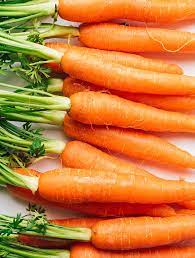
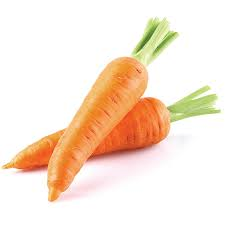
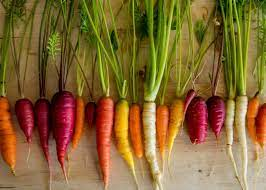
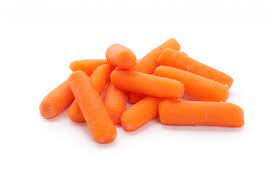
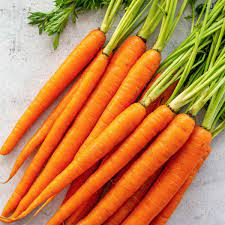
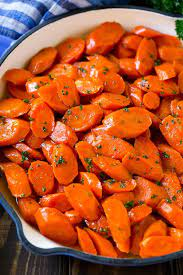
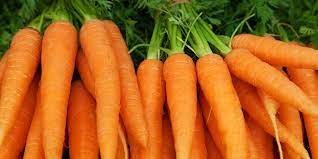
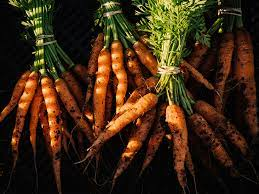
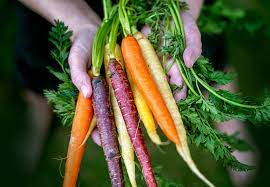
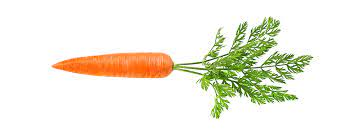
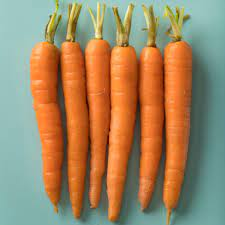
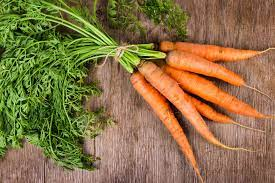
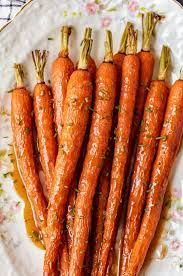
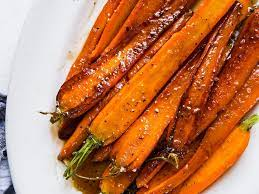
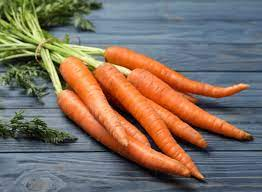
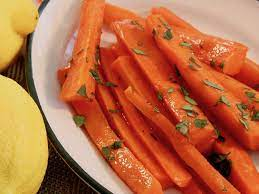
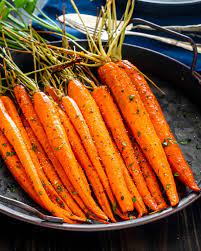
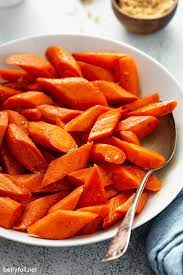
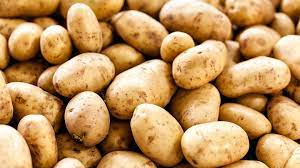
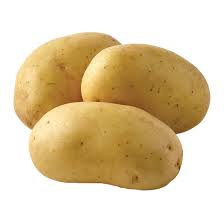
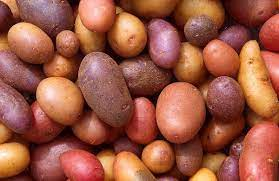
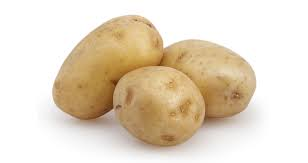
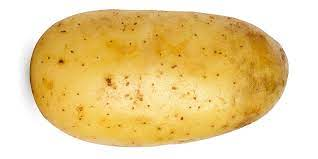
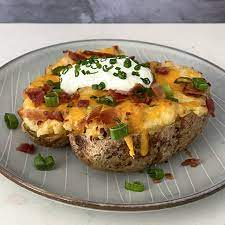
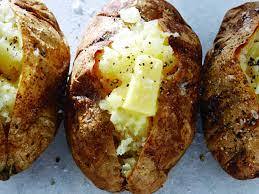
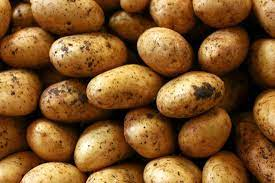
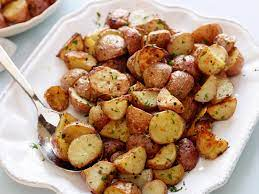
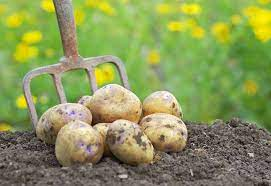
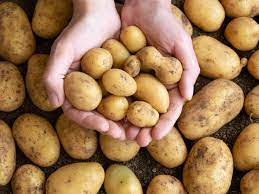
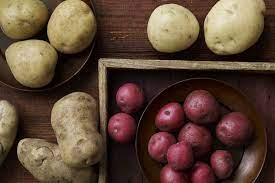
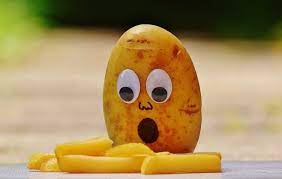
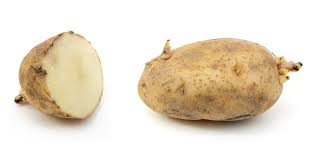
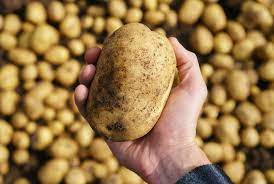
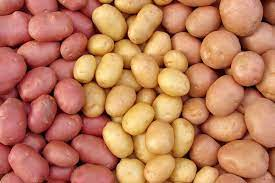
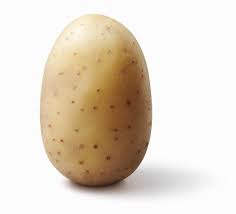
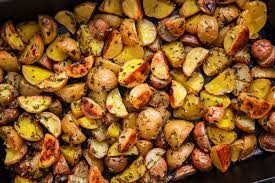
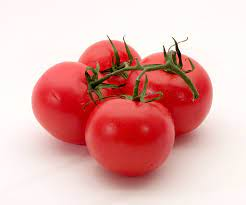
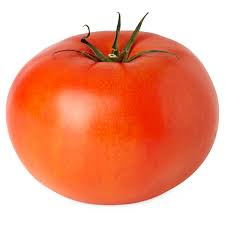
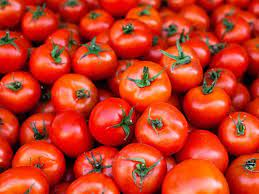
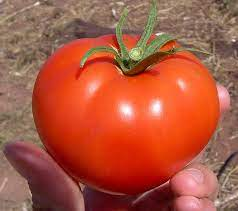
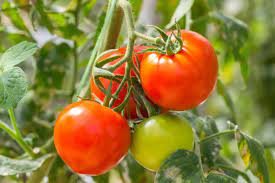
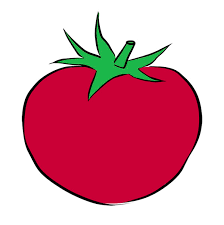
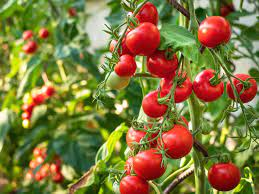
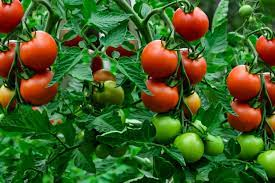
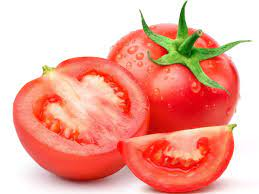
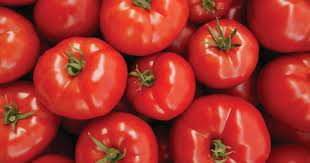
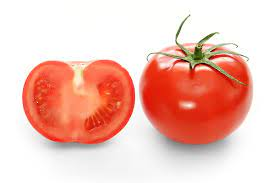
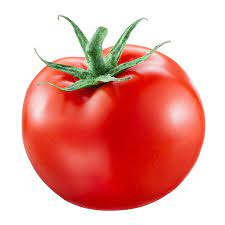
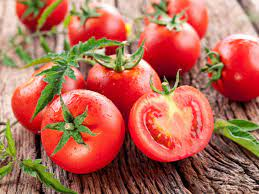
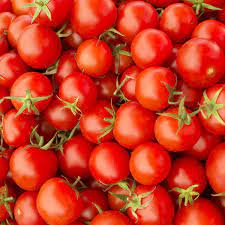
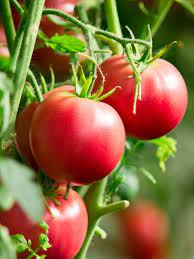
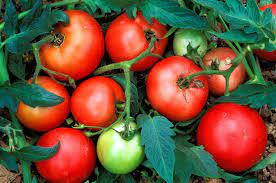
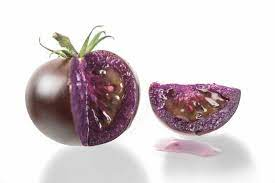
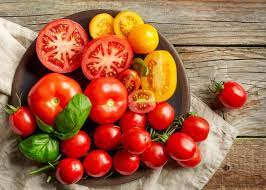
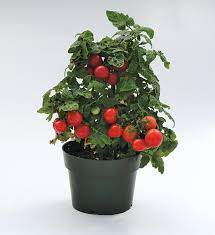
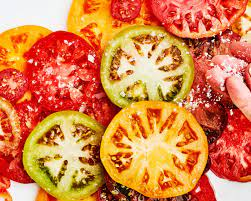
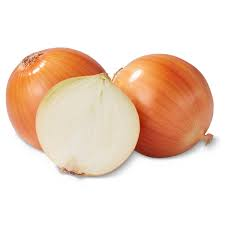
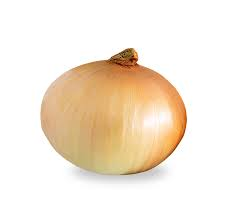
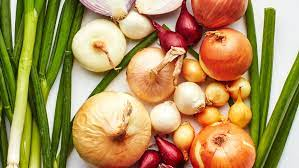
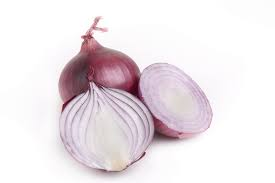
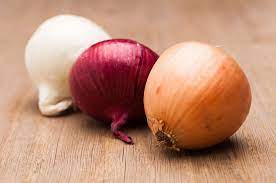
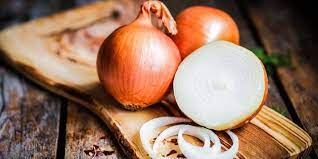
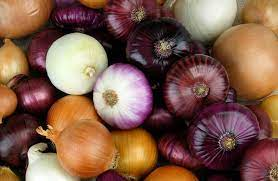
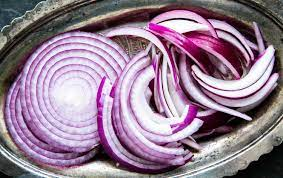
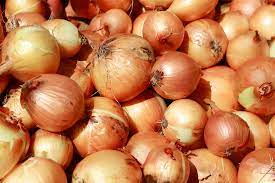
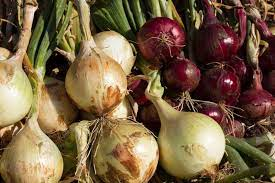
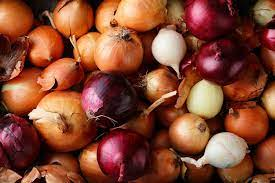
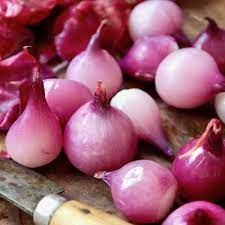
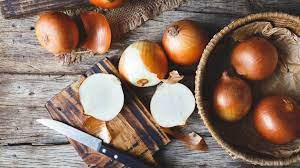
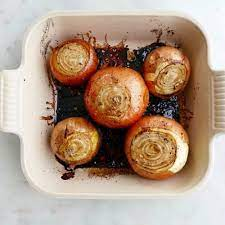
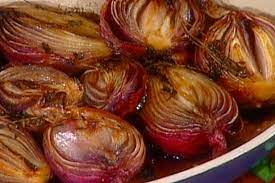
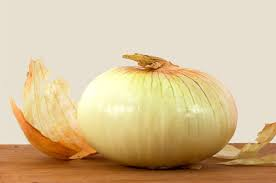
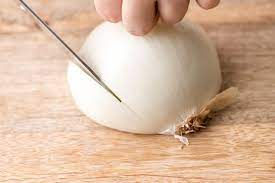
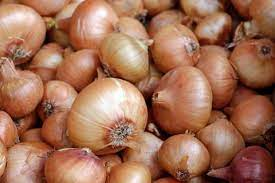
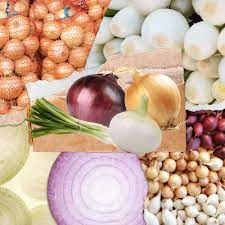
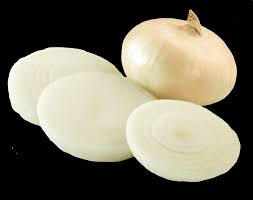
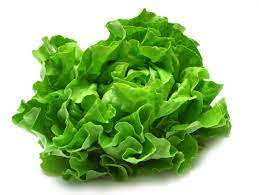
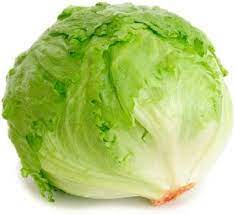
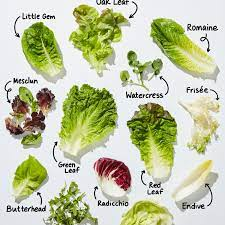
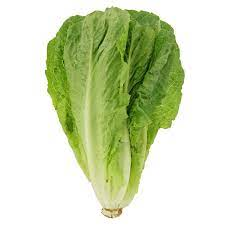
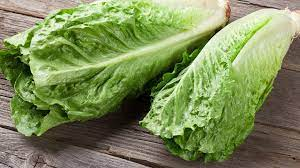
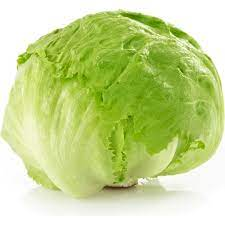
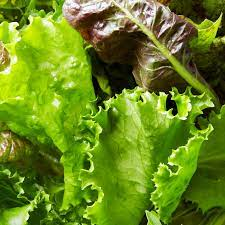
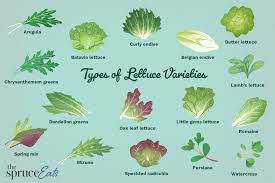
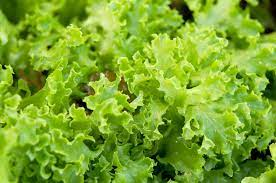
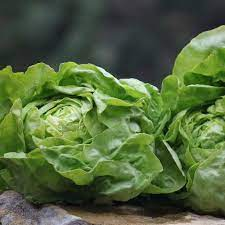
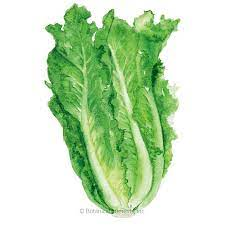
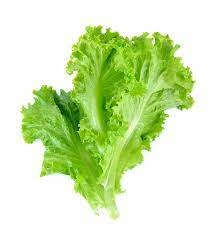
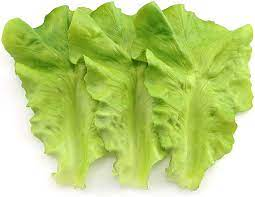
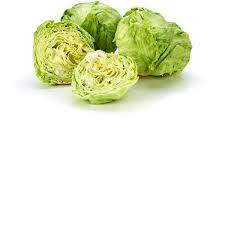
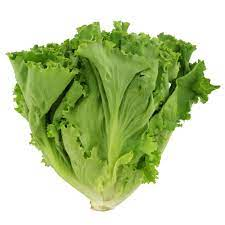
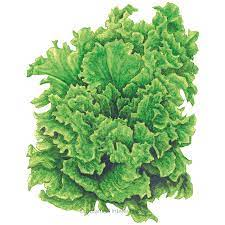
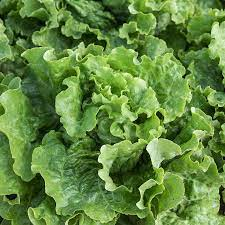
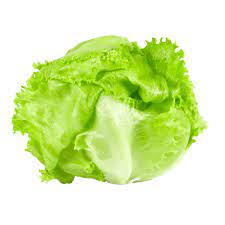
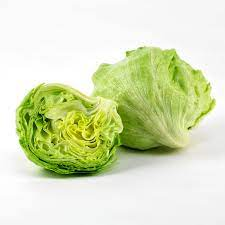
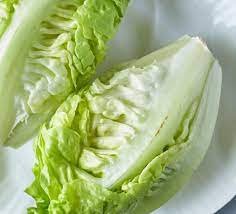
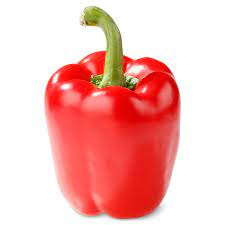
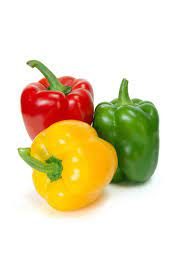
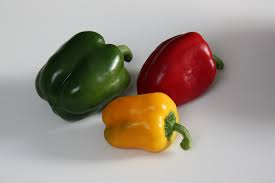
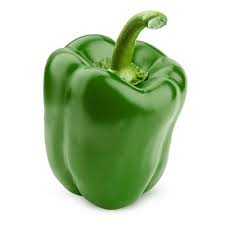
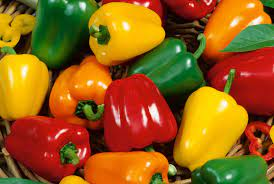
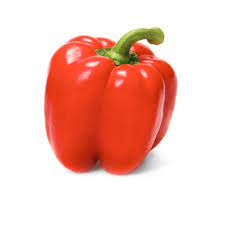
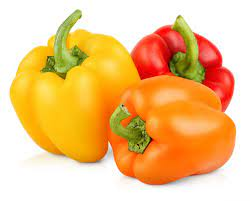
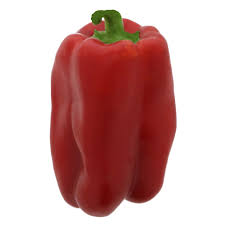
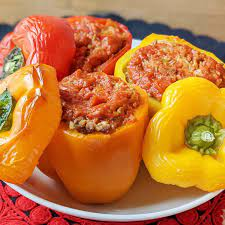
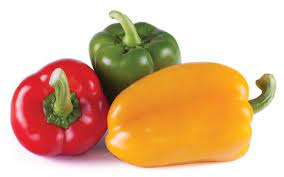
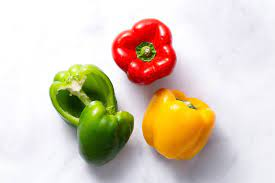
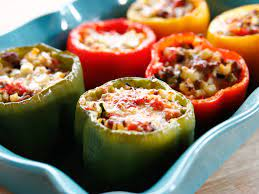
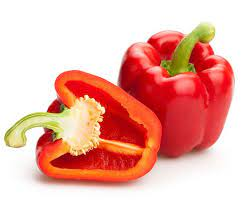
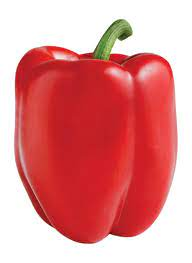
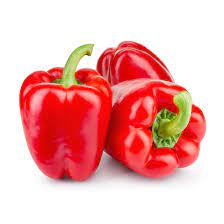
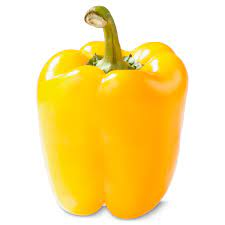
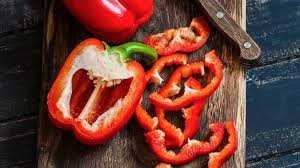
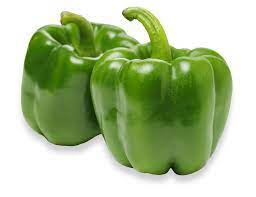
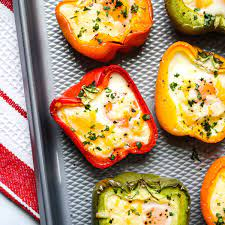
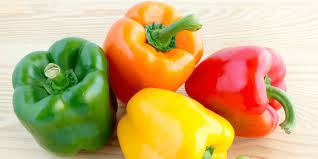
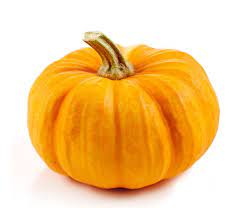
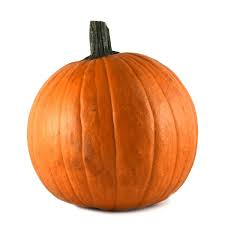
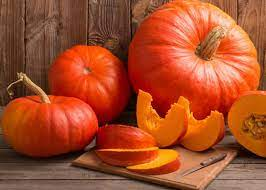
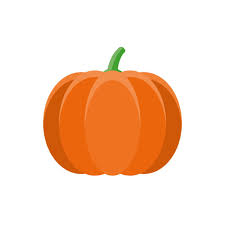
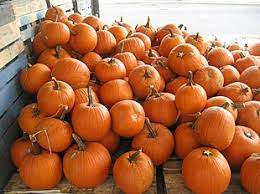
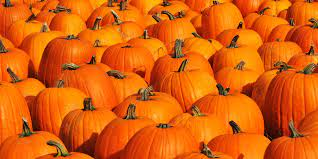
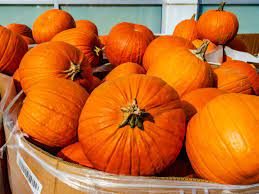
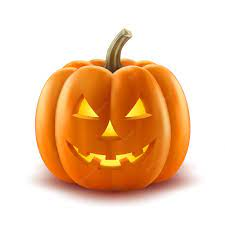
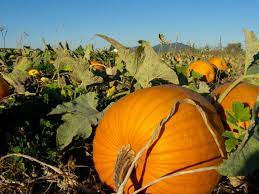
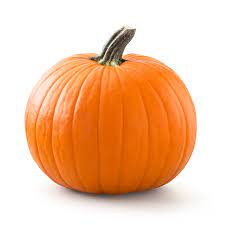
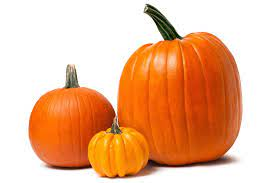
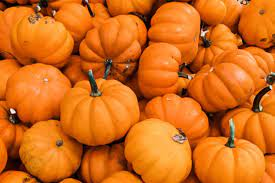
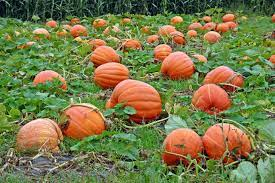
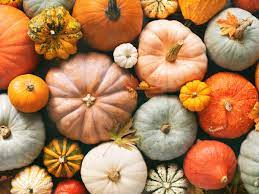
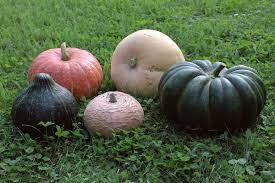
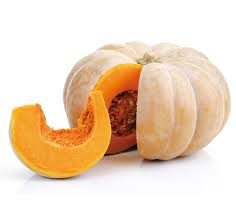
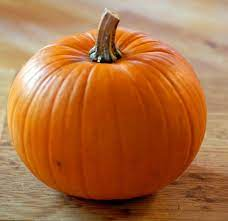
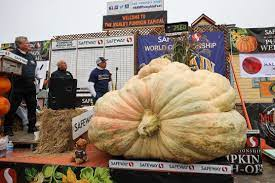
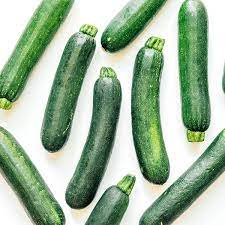
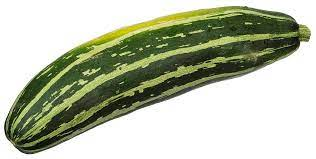
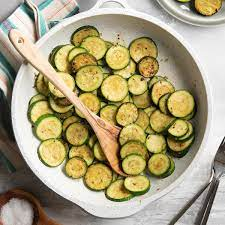
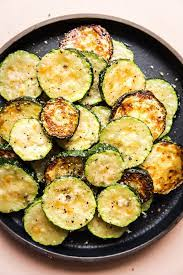
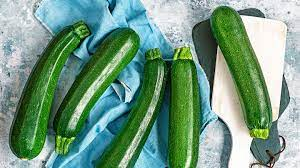
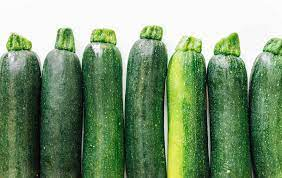
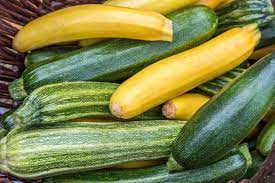
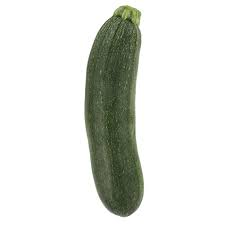
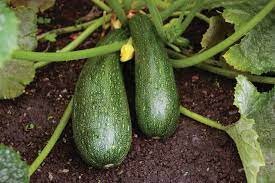
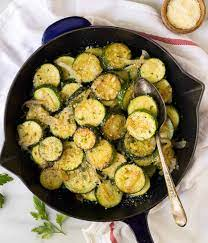
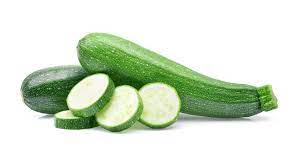
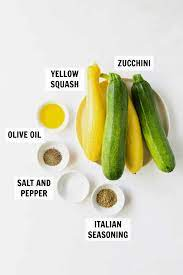
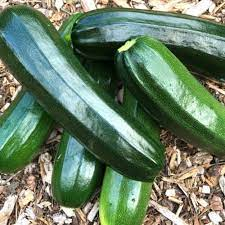
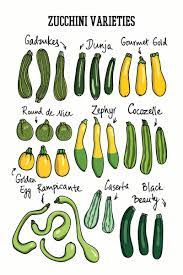
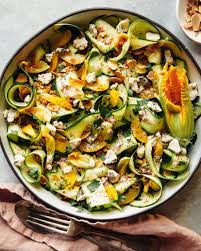
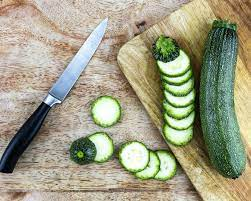
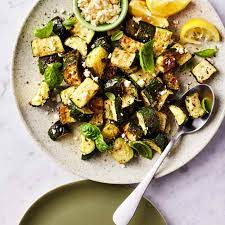
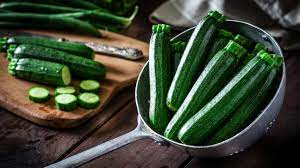
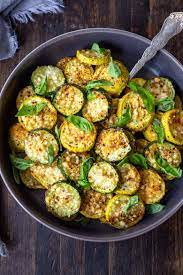
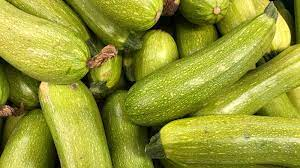
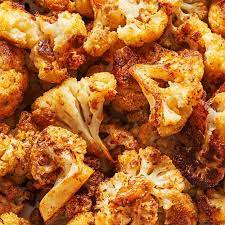
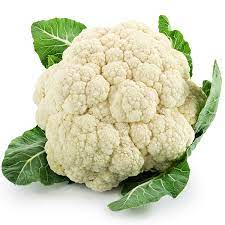
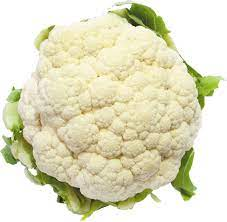
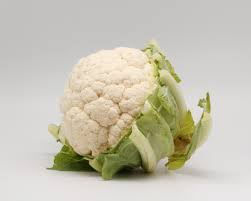
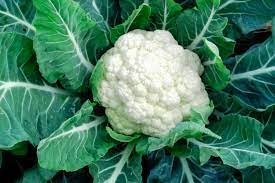
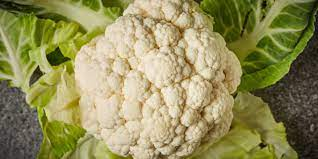
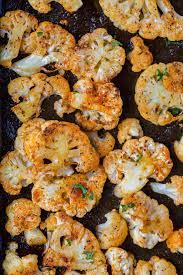
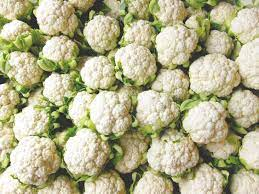
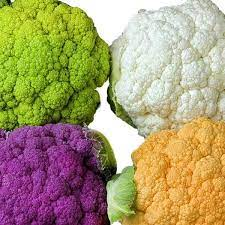
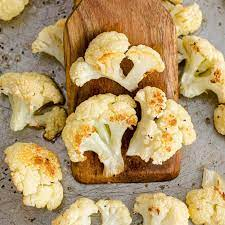
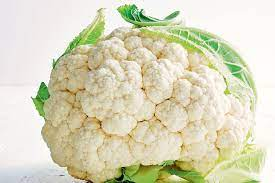
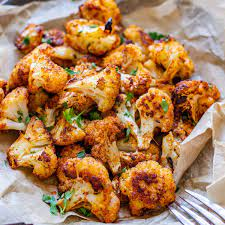
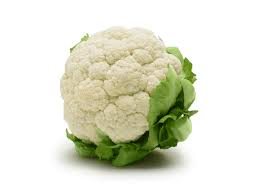
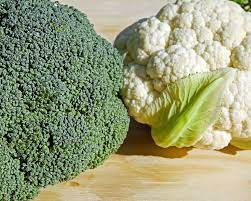
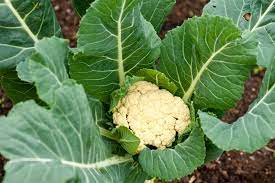
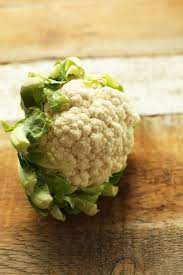
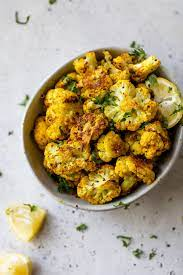
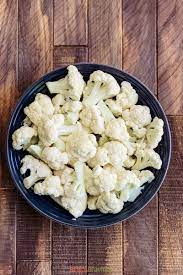
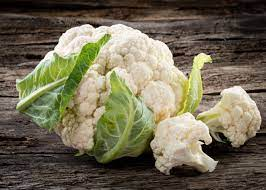
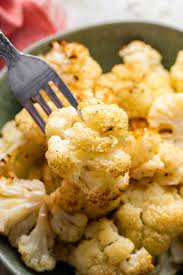
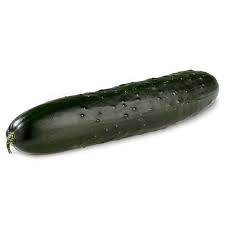
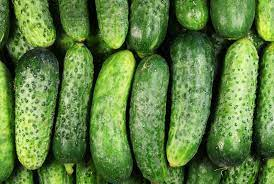
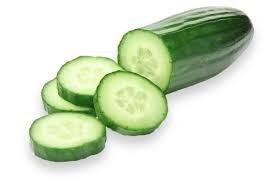
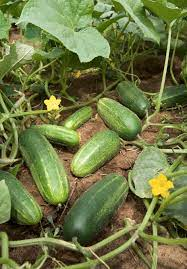
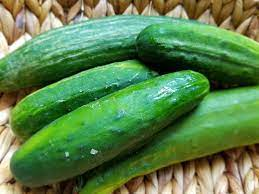
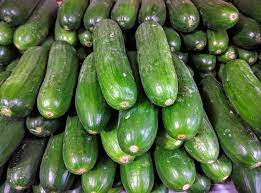
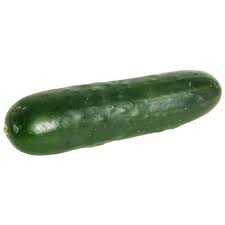
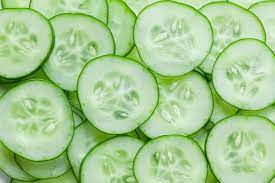
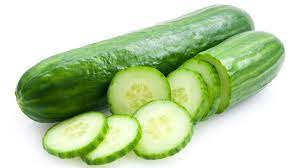
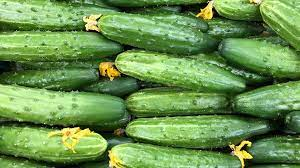
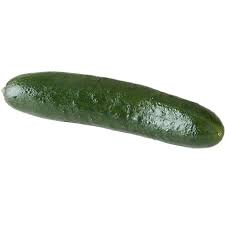
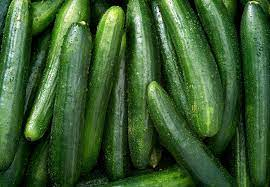
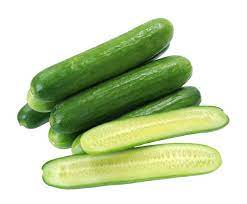
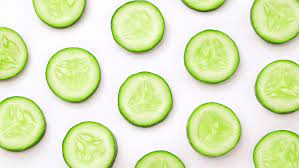
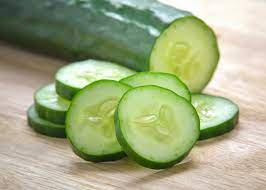
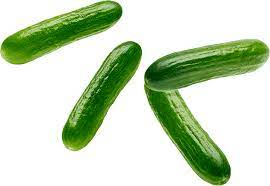
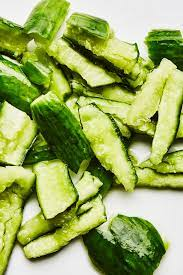
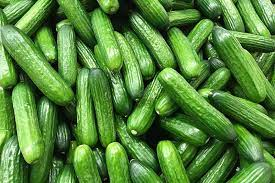

In [3]:
# Path to a chromedriver to start dynamically scrapping all plants
DRIVER_PATH = 'chromedriver.exe'
driver = webdriver.Chrome(executable_path=DRIVER_PATH)
for i in range(len(plant_name_list)):
    plant = plant_name_list[i]
    driver.get('https://www.google.com/search?q=' + plant +'&sxsrf=ALiCzsaji2Ezf_rA_JnE3VktpaOIKntPwQ:1669746319888&source=lnms&tbm=isch&sa=X&ved=2ahUKEwic74vigdT7AhU-BjQIHVMDA_wQ_AUoAXoECAIQAw&biw=458&bih=992&dpr=1.25')
    height_before = driver.execute_script("return document.body.scrollHeight")

    # Loop enough times to reach the bottom of Google search
    for i in range(15):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
        height_after = driver.execute_script("return document.body.scrollHeight")
        time.sleep(3)
        if (height_after == height_before):

            # Try to click 'Load More' 
            try:
                element = driver.find_elements(By.CLASS_NAME, "mye4qd")[0].click()
                element[0].click()
            except:
                pass
        height_before = height_after
    soup = BeautifulSoup(driver.page_source)
    pictures = soup.find_all("div", {"class": "isv-r PNCib MSM1fd BUooTd"})
    
    # Captures all the urls
    urls = []
    for each in pictures:
        img = each.find("img")
        if img.has_attr('src'):
            print(img['src'])
            urls.append(img['src'])
    len(urls)

    try:
        os.makedirs("plant/" + plant)
    except FileExistsError:
        pass

    # Downloads each urls as image
    def downloader(link, i):
        file_name = "plant/" + plant + "/" + plant + str(i) + ".jpeg"
        urllib.request.urlretrieve(link, file_name)
        # time.sleep(5)

    # connection_mgr = urllib3.PoolManager(maxsize=5)
    # thread_pool = ThreadPoolExecutor(5)

    # Multi Treading for speed
    with ThreadPoolExecutor() as executor:
        i = range(len(urls))
        results = executor.map(downloader, urls, i)
